In [46]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [47]:
torch.__version__

'1.13.1+cu117'

In [48]:
torch.cuda.is_available()

True

In [49]:
path_top21 =  Path('data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [50]:
df_reduced = df

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


<Axes: >

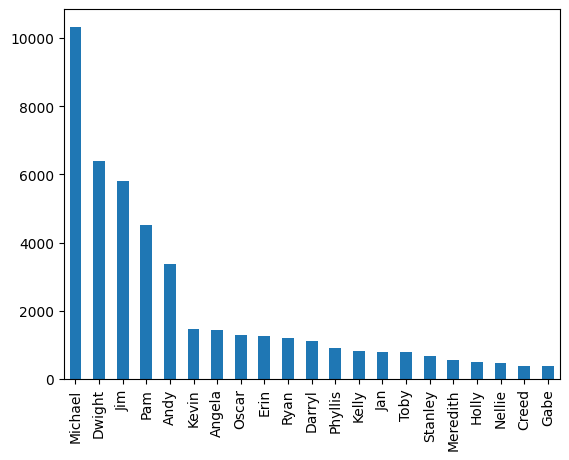

In [51]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [52]:
max_dialog = df_reduced['speaker'].value_counts().max()

10332

In [53]:
import random

dfs_oversampled = [df_reduced]
for _, group in df_reduced.groupby('speaker'):
    rand_mult = random.uniform(0.85, 1.15)
    sample_amt_to_max = max_dialog - len(group)
    dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
df_reduced = pd.concat(dfs_oversampled)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
18099,6,4,73,What?,Toby,False
1370,8,4,16,"Hey, where do I park?",Toby,False
41167,5,8,15,Hey guys that's really inappropriate.,Toby,False
32034,5,24,8,Can't you just not look at his feet?,Toby,False


<Axes: >

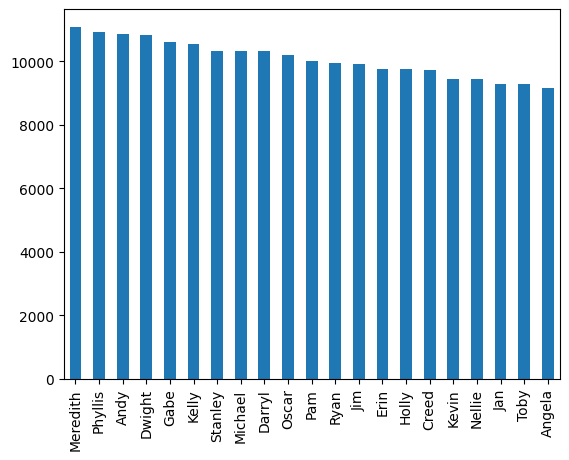

In [54]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [55]:
dls = TextDataLoaders.from_df(df_reduced, text_col='line_text', label_col='speaker', shuffle_train=True)
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj nanoo , nanoo . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj vietnam ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj oh ! xxmaj seven new comments . ' the guy at 0:19 is hawt ! ' [ typing ] ' hi xxmaj bongripper , it 's me , xxmaj andy . xxmaj the guy from 0:19 , xxmaj i 'm glad that you enjoyed my work in that promo . i really enjoyed your comment , going to read some more comments now . xxmaj have a great day!'[reading ] ' he 's not hawt , he 's gay . ' [ typing ] ' dear jasonjasonjason , it 's me , xxmaj andy . xxmaj nice name . xxmaj not ! xxmaj guess what ? xxmaj i 'm not gay ! xxmaj so you are an xxup idiot . xxmaj and i am hawt , according to people on this site who have a brain . xxmaj never comment on this page ever again . ' [",Andy
2,"xxbos xxmaj you talkin ' to me ? xxmaj you talkin ' to me ? ' xxunk xxmaj bull . ' xxmaj xxunk . xxmaj oh , i want that footage . i want it . i need it . xxmaj ah , i have to get back to work . i have lots of work … xxmaj oh , oh check this out . xxmaj come here . [ michael opens his blinds and looks at xxmaj ryan in the parking lot ] xxmaj there he is . xxmaj mr . xxmaj temp . xxmaj having lunch by the car . xxmaj let us play with him . xxmaj this 'll be hilarious . [ calls xxmaj ryan on the phone , xxmaj ryan does n't pick up after seeing that xxmaj michael is calling ] xxmaj oh , we 're playing phone tag .",Michael
3,"xxbos xxmaj come on , coward ! xxmaj where are you ? xxmaj where … [ spots a note attached to the bushes ; goes to read it ] ' from the desk of xxmaj andrew xxmaj bernard . ' [ scoffs ] a note . xxmaj pathetic . ' dear xxmaj dwight , by now you have received my note . xxmaj how are you ? i am well . xxmaj you are no doubt wondering why i have left this note . xxmaj it has come to my attention that in any physical match with you , i would surely be xxunk . ' xxmaj true . ' the soft xxunk of my xxunk upbringing is my soft xxunk … ' [ as xxmaj dwight continues to read , xxmaj andy drives around the corner very slowly ]",Dwight
4,"xxbos xxmaj i 've really been putting in the hours on this mural . xxmaj and my boss is totally xxup ok with it , because he 's in the xxmaj bahamas and has no clue what anybody is doing . xxmaj i 'm usually very self - critical . i hate what i paint . xxmaj but , i do n't know , this time i feel like it 's , um , it 's really coming together … [ sees mural ] xxmaj oh my god ! [ camera pans to mural with butts painted over it ] xxmaj wha ? xxmaj you 've got ta be kidding me ! xxmaj what it … are those … are those butts ? [ to warehouse crew ] xxmaj huh ? xxmaj no way . xxmaj no way !",Pam
5,"xxbos xxmaj well , xxmaj valentine 's surprise for xxmaj erin . xxmaj hello ? xxmaj super romantic . xxmaj and i got you something . [ removes wooden instruments from bag ] xxmaj oh , it 's a couple of pieces of bamboo . xxmaj big deal , right ? xxmaj no . xxmaj these are musical instruments . xxmaj it 's so we can play island music together . xxmaj cause i have this . [ removes gã¯â¿â½ã¯â¿â½iro and begins playing and singing ] xxmaj clop the cloppers . xxmaj yeah , clop 'em . xxmaj it 's called xxmaj bembe . [ sings while xxmaj kevin echoes ]",Andy
6,"xxbos xxmaj more like ' everyone let 's get your boss laid xxmaj saturday . ' [ more laughs ] [ toby puts his hand on xxmaj pam 's knee , everyone stares , xxmaj toby removes his hand ] i have an announcement uh , to make . i am m

In [56]:
type(dls.train.items)

pandas.core.frame.DataFrame

0.01

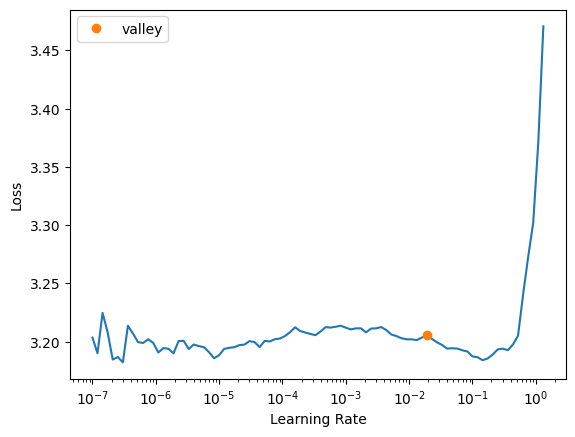

In [58]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)
learner.lr_find()
# learner.fine_tune(10, 1e-2)
suggestedLR = 1e-2

In [59]:
learner.fine_tune(25, suggestedLR)

epoch,train_loss,valid_loss,accuracy,time
0,3.003069,2.964949,0.102087,00:37


epoch,train_loss,valid_loss,accuracy,time
0,2.726326,2.498831,0.267117,01:17
1,2.319392,1.960426,0.424875,01:18
2,1.964121,1.572393,0.530598,01:18
3,1.680755,1.265463,0.621919,01:17
4,1.386216,1.056665,0.677023,01:16
5,1.122544,0.918813,0.715318,01:16
6,1.118224,0.807778,0.745986,01:16
7,1.028391,0.744130,0.763670,01:16
8,1.009271,0.693522,0.778733,01:16
9,0.852689,0.642357,0.793654,01:16


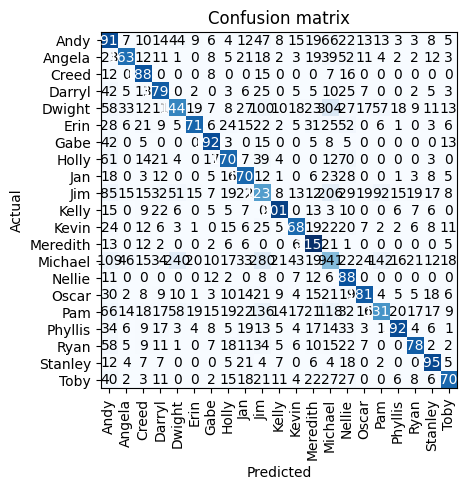

In [60]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [61]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.486524,0.496731,0.847955,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.459593,0.485456,0.851308,01:19
1,0.513780,0.508834,0.844863,01:18
2,0.539771,0.504951,0.844013,01:18
3,0.517102,0.515159,0.844957,01:18
4,0.591951,0.502844,0.847224,01:17
5,0.541525,0.497929,0.850954,01:16
6,0.468842,0.492363,0.852559,01:16
7,0.433754,0.483627,0.856620,01:18
8,0.356572,0.486787,0.856242,01:18
9,0.279522,0.487612,0.855487,01:21


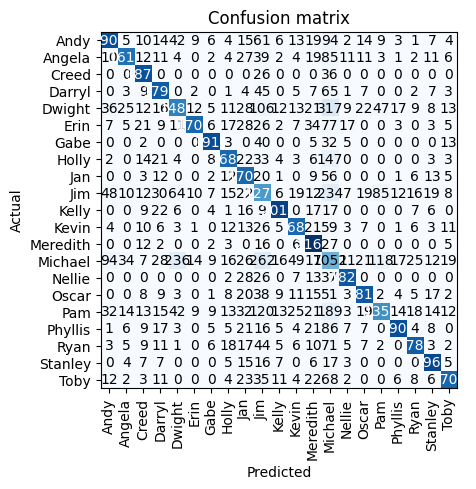

In [62]:
interp.plot_confusion_matrix()

In [16]:
dls.show_batch()

,text,category
0,"xxbos xxmaj look , i am not a xxunk . i ca n't … i ca n't dress like xxmaj donald xxmaj trump dresses . i have to stay within the parameters of my budget . i ca n't shop at a fancy xxmaj xxunk xxunk . i buy my suits the old fashioned way . i buy them from discount stores … or on ebay . xxmaj and when i found out that xxmaj xxunk was having a midnight xxunk sale , i ran , not walked , as per the instructions on the flier . xxmaj and i got there , and when the doors opened , all of these women ran to this one xxunk . xxmaj and i did too . xxmaj and i grabbed this suit . xxmaj and a woman , sort of a , i do n't know , xxmaj xxunk xxmaj elliot",Michael
1,"xxbos xxmaj hey everyone . xxmaj hi . xxmaj quite an afternoon , huh ? xxmaj cathartic in a way . xxmaj i 'm glad i got to share it with you . xxmaj it makes you think about what 's really important . [ pam hands xxmaj jim a note ] xxmaj it 's not about showing you 're in charge or flexing some sort of authority . xxmaj it 's about forgiveness . xxmaj and yes , xxmaj i 'm talking about you three in this desk clump right here . i think that , if you were to apologize to me , then i would revoke your suspension .",Gabe
2,"xxbos [ on phone ] xxmaj hello ? … .justine ! [ laughs ] xxmaj nice surprise ! xxmaj how you doin' baby ? … .nah . xxmaj no no , i did n't win . xxmaj when i got promoted i stop- … what ? … yeah . xxmaj yeah , xxmaj glenn won … .oh , you wanna call him ? xxmaj yeah , you should call him , congratulate him . xxmaj that 'll be- … what ? … .oh , his number 's in your old phone . xxmaj oh , you know what ? i might have it right- [ hangs up ] xxmaj whoops .",Darryl
3,"xxbos xxmaj it 's true . xxmaj i 'm having a party . xxmaj i 've got three cases of xxunk beer , a karaoke machine , and i did n't invite xxmaj michael . xxmaj so three xxunk for a great party . xxmaj and it 's nothing personal , i just think that if he were there , people would n't be able to relax , and you know , have fun , and my xxunk wants to meet everybody . xxmaj because xxmaj i 'm pretty sure he thinks that xxmaj i 'm making xxmaj dwight up . [ sighs ] xxmaj he is very real .",Jim
4,"xxbos xxmaj that 's weird . xxmaj because i was just walking past his desk and i saw this , which is a tollbooth receipt from xxmaj new xxmaj york xxmaj city , stamped really early this morning . xxmaj so , why would xxmaj dwight go to xxmaj new xxmaj york without telling anyone ? xxmaj do you think he went to see xxmaj jan ? xxmaj that 's not like him . xxmaj is it ? xxmaj someone told me a story about this , with , like , laundry and betrayal . xxmaj did you betray xxmaj dwight and try to steal his job or something ?",Andy
5,"xxbos xxmaj when you 're a kid , you picture a pilot kinda like this [ imitates plane noises while steering wildly ] xxmaj but then you learn that 's crashing the plane . xxmaj the right way to do it is more like this . [ calmly pulls imaginary steering back and forth ] xxmaj or better yet , like this . [ takes hands off imaginary wheel ] xxmaj now that xxmaj i 'm manager , i think about that a lot . i let xxmaj dwight run the meetings , i let good people do good work and i stay out of the way .",Andy
6,"xxbos xxmaj thank you . xxmaj kelly , i ca n't promise you that we 'll always stay together . i ca n't promise you that xxmaj i 'll never cheat on you . xxmaj nor should xxup i. xxmaj modern marriages are n't built that way . xxmaj men are n't built that way . xxmaj there 's a very interesting article i can email to you . xxmaj but i can tell you this . xxmaj even if the odds are fifty - fifty that we 'll break up within the week , i wanna roll those dice . i love you , xxmaj kelly .",Ryan
7,"xxbos xxmaj or maybe there 's a xxmaj god . i do n't know . i mean , it 's just not a guy with a long white beard . [ erin looks shocked ] xxmaj or it could be . i mean , it 's possible that that is exactly what - what xxmaj god is . xxmaj but for all of the disbelief [ phone rings ] i b

In [63]:
learner.predict("dwight try to help him down")

('Pam',
 tensor(16),
 tensor([7.9729e-03, 2.2631e-04, 2.1630e-05, 5.2793e-04, 9.9232e-03, 6.2014e-02,
         5.0743e-06, 8.7377e-05, 3.2034e-04, 4.3823e-03, 6.2332e-04, 1.8896e-03,
         3.3830e-06, 3.1012e-02, 1.6919e-05, 1.3658e-04, 8.7727e-01, 6.5517e-04,
         2.7428e-03, 2.3915e-05, 1.4981e-04]))

In [64]:
learner.show_results()

,text,category,category_
0,"xxbos xxmaj look , i am not a xxunk . i ca n't … i ca n't dress like xxmaj donald xxmaj trump dresses . i have to stay within the parameters of my budget . i ca n't shop at a fancy xxmaj xxunk xxunk . i buy my suits the old fashioned way . i buy them from discount stores … or on ebay . xxmaj and when i found out that xxmaj ross was having a midnight madness sale , i ran , not walked , as per the instructions on the flier . xxmaj and i got there , and when the doors opened , all of these women ran to this one bin . xxmaj and i did too . xxmaj and i grabbed this suit . xxmaj and a woman , sort of a , i do n't know , xxmaj xxunk xxmaj elliot",Michael,Michael
1,"xxbos xxmaj oh ! xxmaj seven new comments . ' the guy at 0:19 is hawt ! ' [ typing ] ' hi xxmaj bongripper , it 's me , xxmaj andy . xxmaj the guy from 0:19 , xxmaj i 'm glad that you enjoyed my work in that promo . i really enjoyed your comment , going to read some more comments now . xxmaj have a great day!'[reading ] ' he 's not hawt , he 's gay . ' [ typing ] ' dear jasonjasonjason , it 's me , xxmaj andy . xxmaj nice name . xxmaj not ! xxmaj guess what ? xxmaj i 'm not gay ! xxmaj so you are an xxup idiot . xxmaj and i am hawt , according to people on this site who have a brain . xxmaj never comment on this page ever again . ' [",Andy,Andy
2,"xxbos xxmaj excuse me . xxmaj i 've been told there 's been some interest in forming a xxmaj union and that xxmaj michael supported it . xxmaj obviously he 's not a friend of yours because he did n't tell you the facts . xxmaj so let me . xxmaj if there is even a whiff of unionizing in this branch , i can guarantee you the branch will be shut down like that [ snaps her fingers ] . xxmaj they unionized in xxmaj pittsfield and we all know what happened in xxmaj pittsfield . xxmaj it will cost each of you a fortune in legal fees and union dues and that will be nothing compared to the cost of losing your jobs . xxmaj so i would think long and hard before sacrificing your savings and your futures just to send a message . xxmaj if you",Jan,Jan
3,"xxbos xxmaj and now , by show of applause , xxmaj we will crown this year 's hay king . xxmaj all in favor of xxmaj purebred . [ crowd applauds ] xxmaj put your hands together for … xxmaj mixed xxmaj bread . [ crowd applauds ] xxmaj and let 's hear it for … xxmaj purebred . [ crowd applauds ] xxmaj mm . xxmaj it appears we have a three - way tie . i have no choice but to pick the xxmaj hay xxmaj king myself . i pick … [ all three contestants begging for xxmaj dwight to pick them ] xxmaj me ! i am your xxmaj hay xxmaj king ! xxmaj all xxmaj hail your xxmaj hay xxmaj king ! [ drowd leaves disgusted , as xxmaj dwight 's worker claps ]",Dwight,Dwight
4,"xxbos xxmaj two nights ago , i went to an xxmaj xxunk xxmaj keys concert at the xxmaj montage xxmaj mountain xxmaj performing xxmaj arts xxmaj center . i scored these great aisle seats . xxmaj anyway , after the opening act this beautiful girl sits down next to me and i never get to meet girls with lip rings and she had one . i do n't know exactly how this happened but one of her friends started passing around some stuff and they said it was xxunk cigarettes , and xxmaj i 'm sure that it was xxunk cigarettes . xxmaj everybody in the aisle was doing it .",Michael,Michael
5,"xxbos xxmaj so , this girl that i basically grew up with becomes xxmaj miss xxmaj west xxmaj virginia , and then suddenly , all the boys start paying attention to me . xxmaj and it was funny because , you know , i never even considered myself beautiful until people started pointing it out to me . xxmaj you know , ' jan , wow , you are so much more beautiful than xxmaj miss xxmaj west xxmaj virginia . ' [ laughs ] xxmaj ah , so that is why i uh … wait , xxmaj pam , what was your , what was your question ? '",Jan,Jan
6,"xxbos xxmaj it 's been a weird week since we found out i had to transfer . xxmaj michael wanted me to quit and get some job here in xxma

In [65]:
learner.predict("hes totally qualified, and smart, everyone loves him")

('Jim',
 tensor(9),
 tensor([1.1718e-02, 1.7376e-03, 3.0226e-04, 2.4387e-03, 3.8090e-02, 8.7412e-03,
         4.7167e-04, 4.3668e-04, 3.0858e-04, 7.2953e-01, 3.2845e-03, 5.3951e-03,
         6.1739e-05, 8.5580e-02, 6.3964e-04, 1.0451e-02, 9.1219e-02, 1.6311e-04,
         8.8014e-03, 1.5471e-04, 4.7988e-04]))

In [66]:
learner.save('35epoch_all_lines')

Path('models/35epoch_all_lines.pth')